# Customer Churn

## Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import category_encoders as ce
from imblearn.over_sampling import SMOTE, SVMSMOTE


## Data Processing

### Load data

In [3]:
dataset = pd.read_csv("train.csv")

In [5]:
dataset.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


### EDA

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [7]:
dataset.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [15]:
# Data object
object_dataset = [f for f in dataset.columns if dataset[f].dtype == "O"]
print(object_dataset)

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


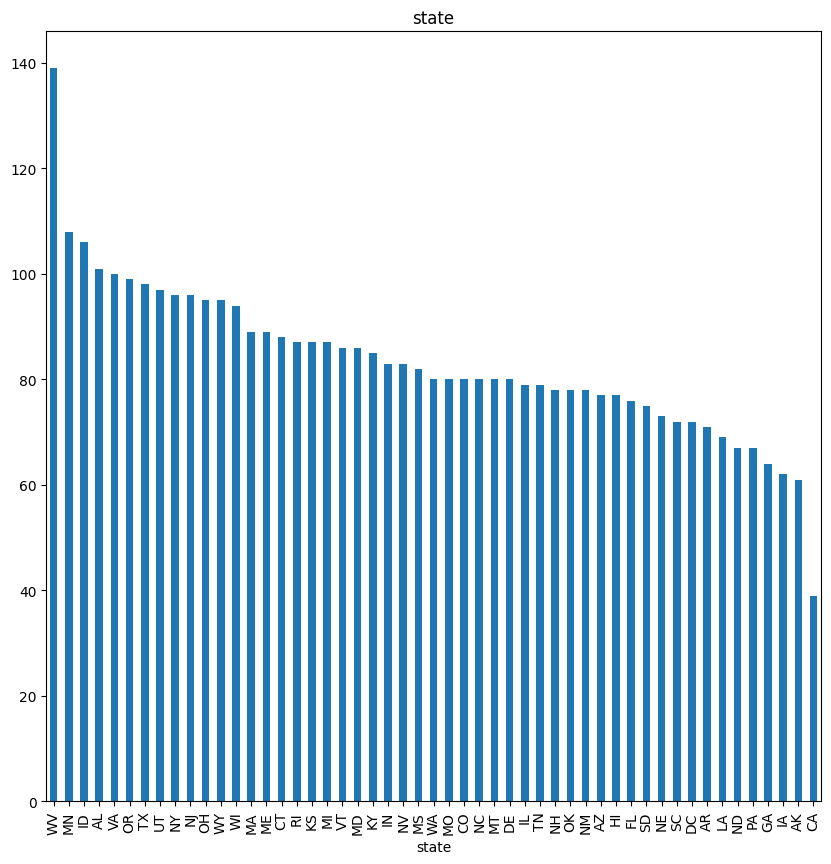

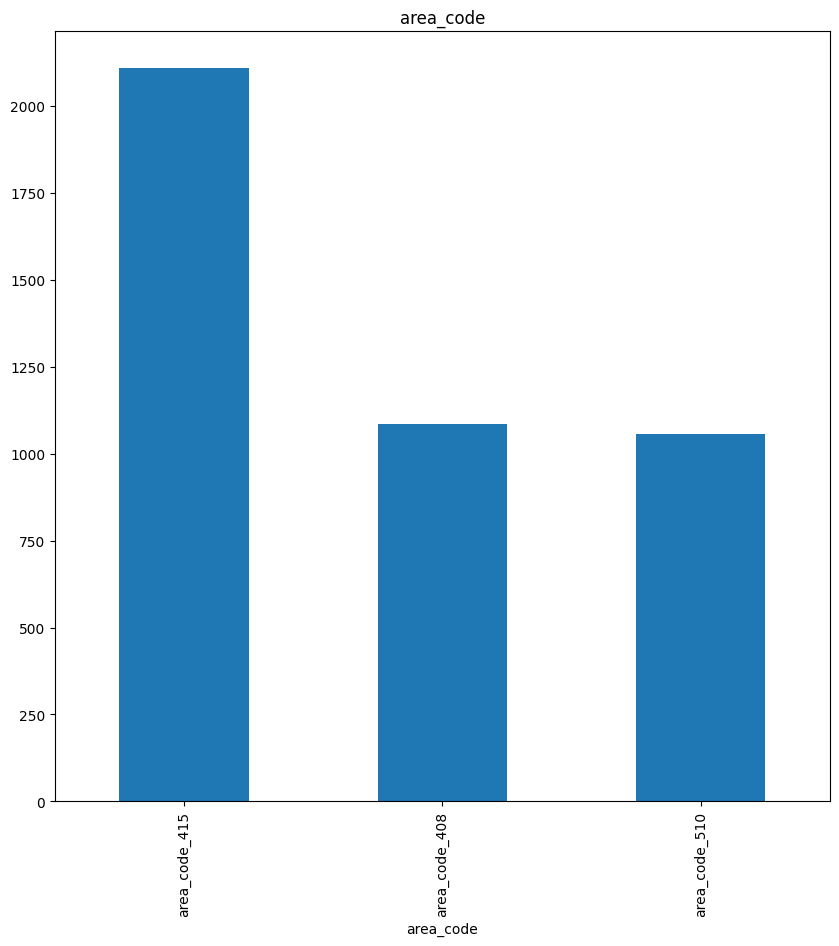

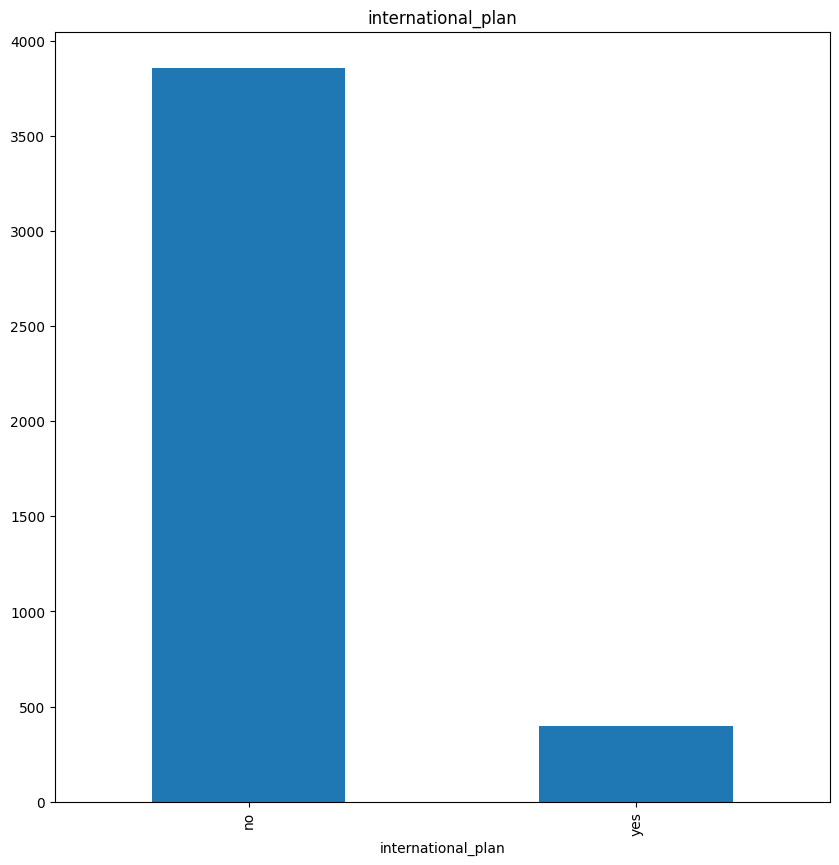

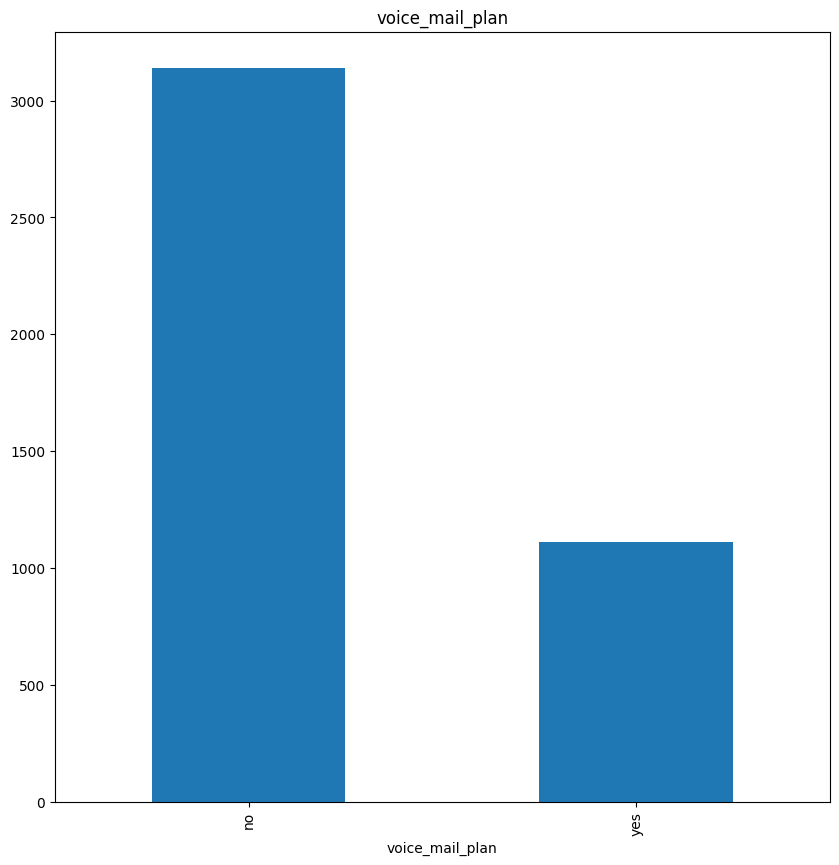

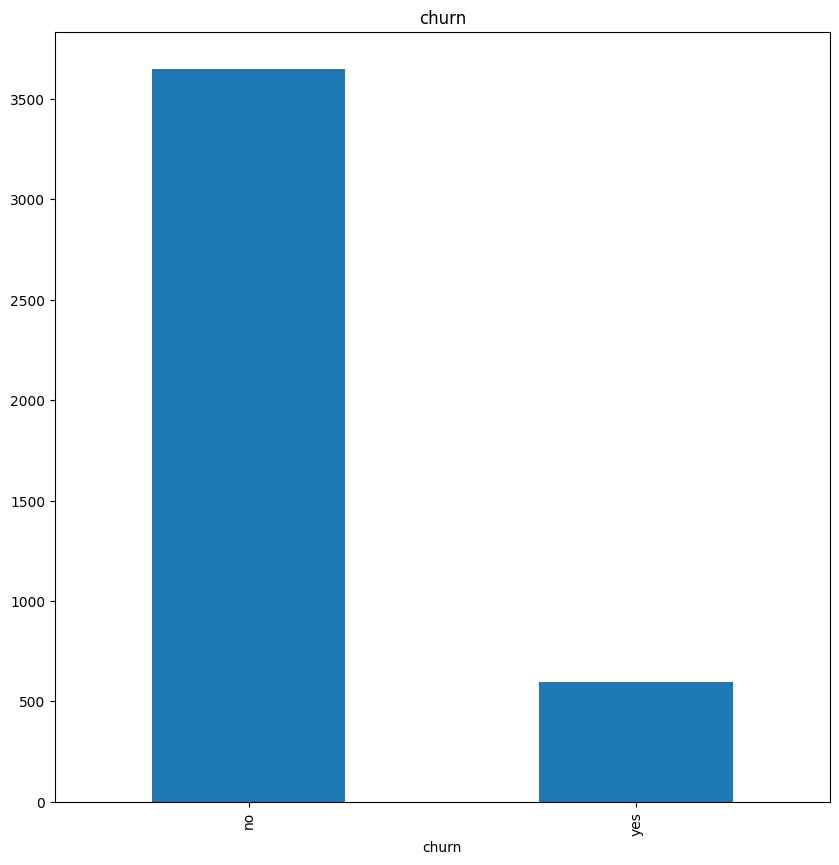

In [16]:
# Plot object
for col in object_dataset:
    dataset[col].value_counts().plot(kind='bar', figsize=(10, 10))
    plt.title(col)
    plt.show()

In [17]:
# Numeric columns
# Data object
numeric_dataset = [f for f in dataset.columns if dataset[f].dtype != "O"]
print(numeric_dataset)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


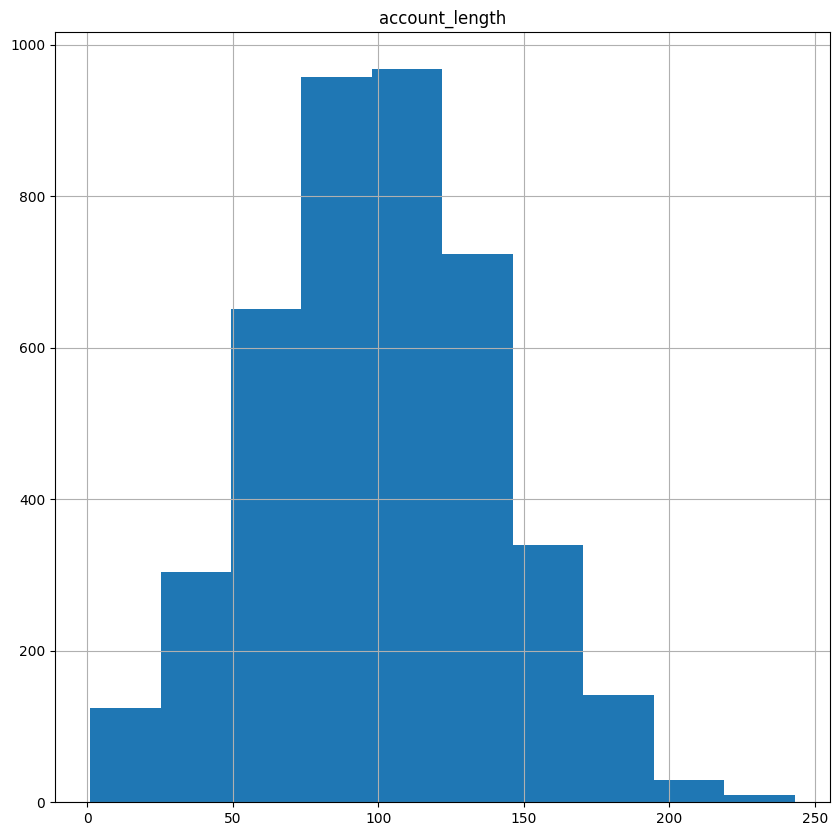

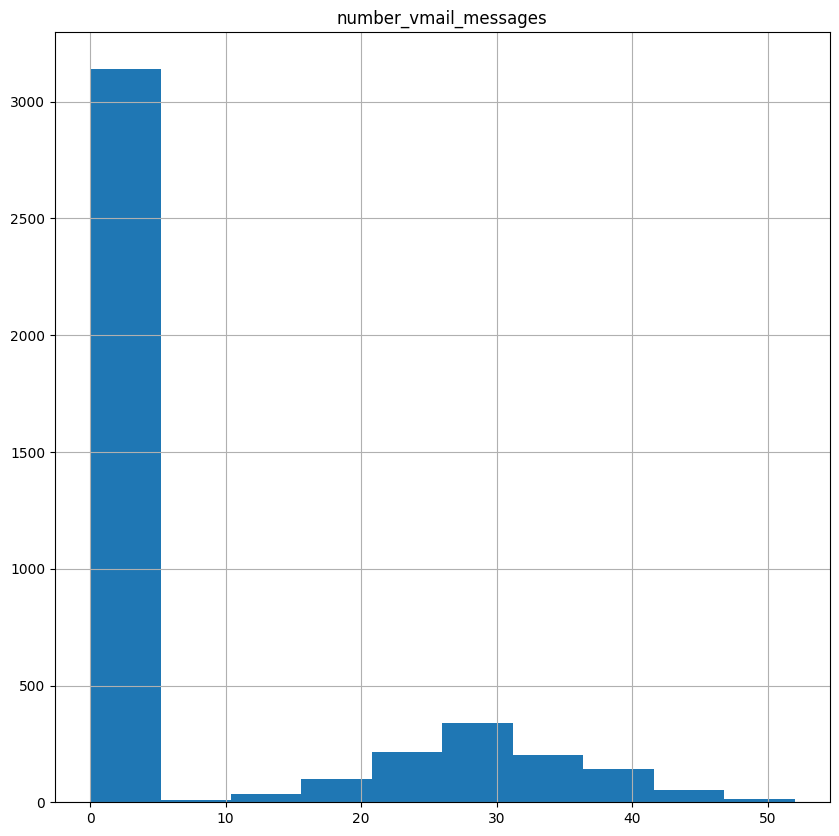

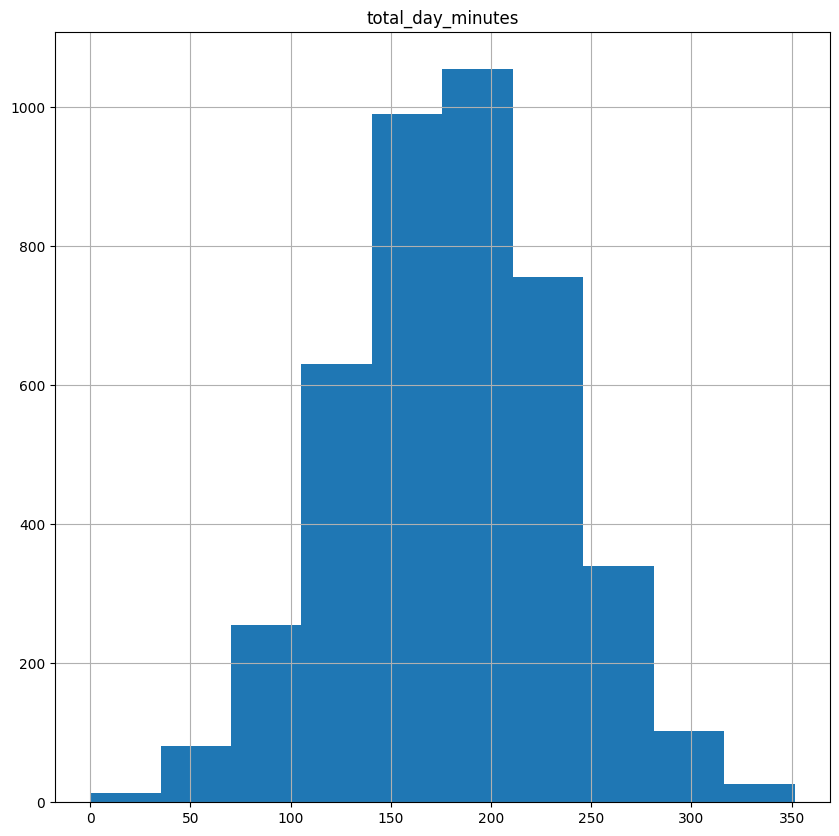

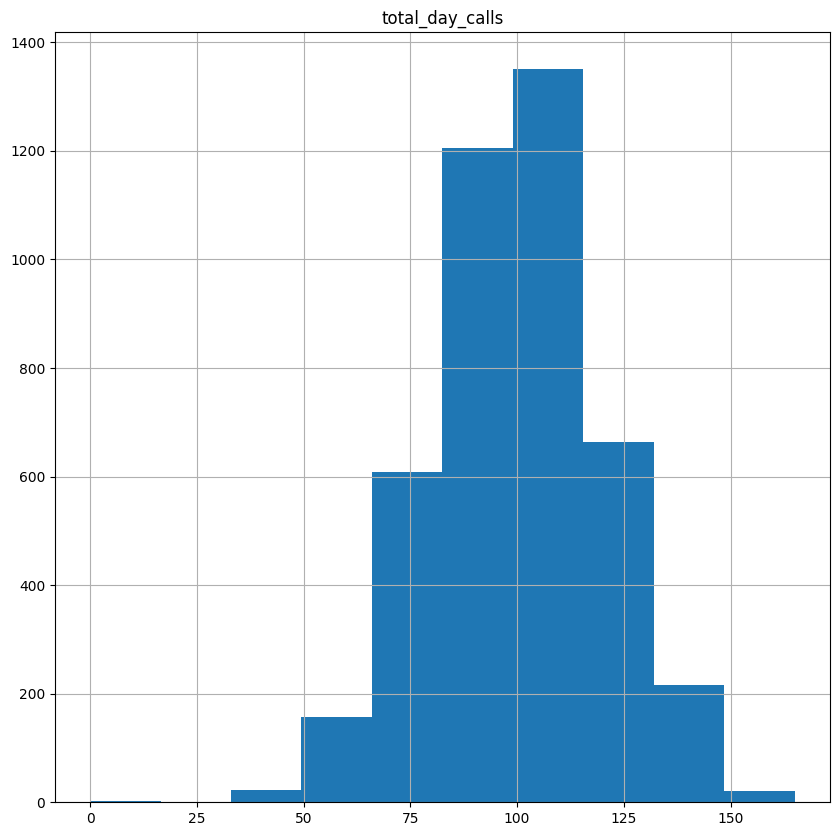

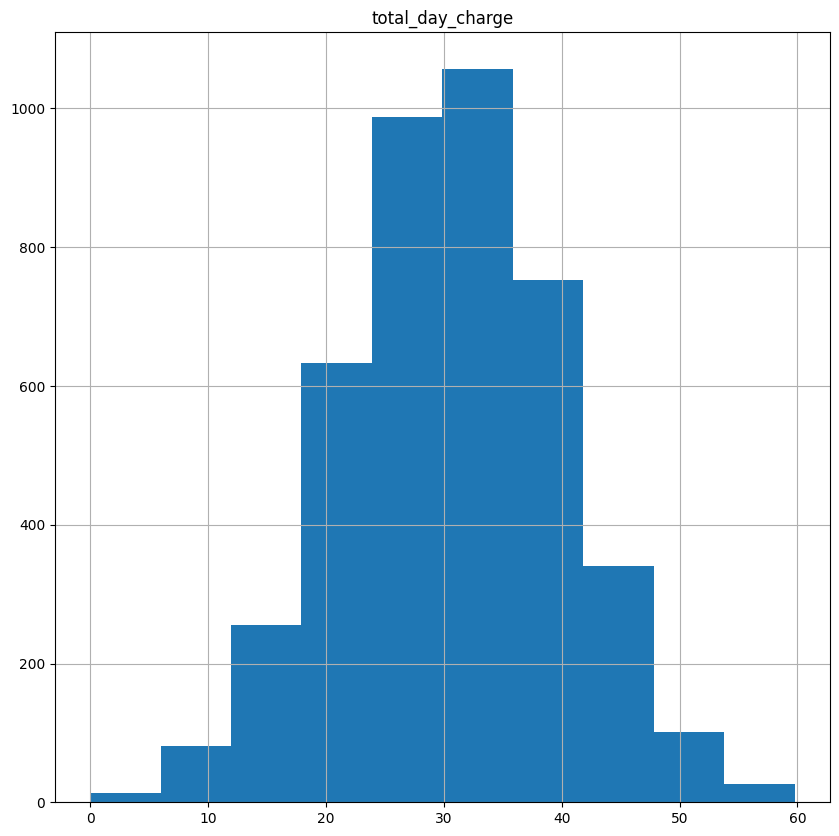

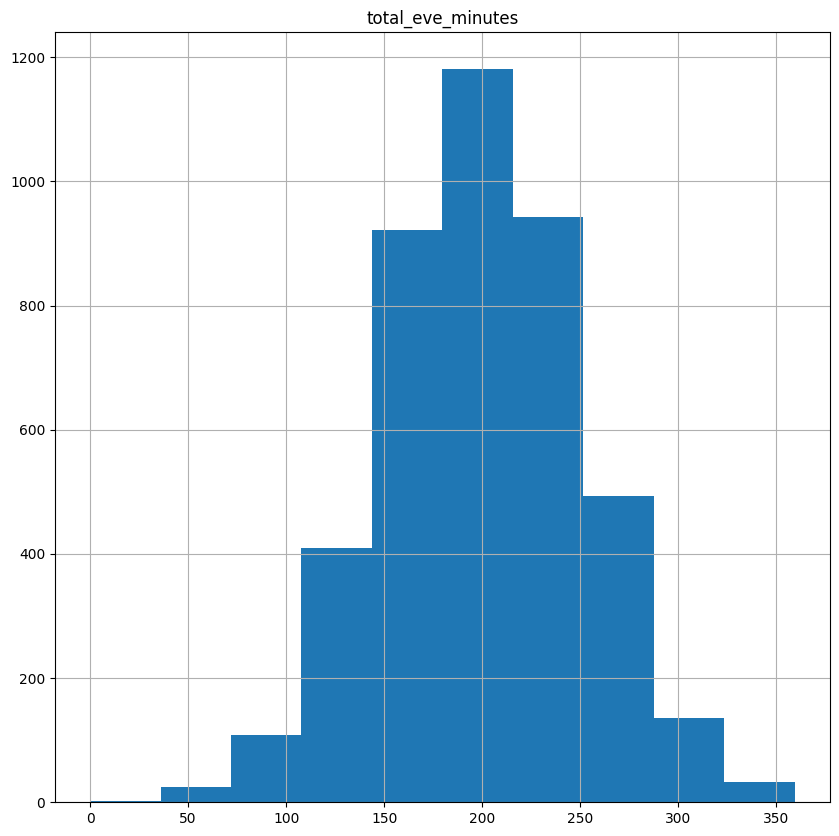

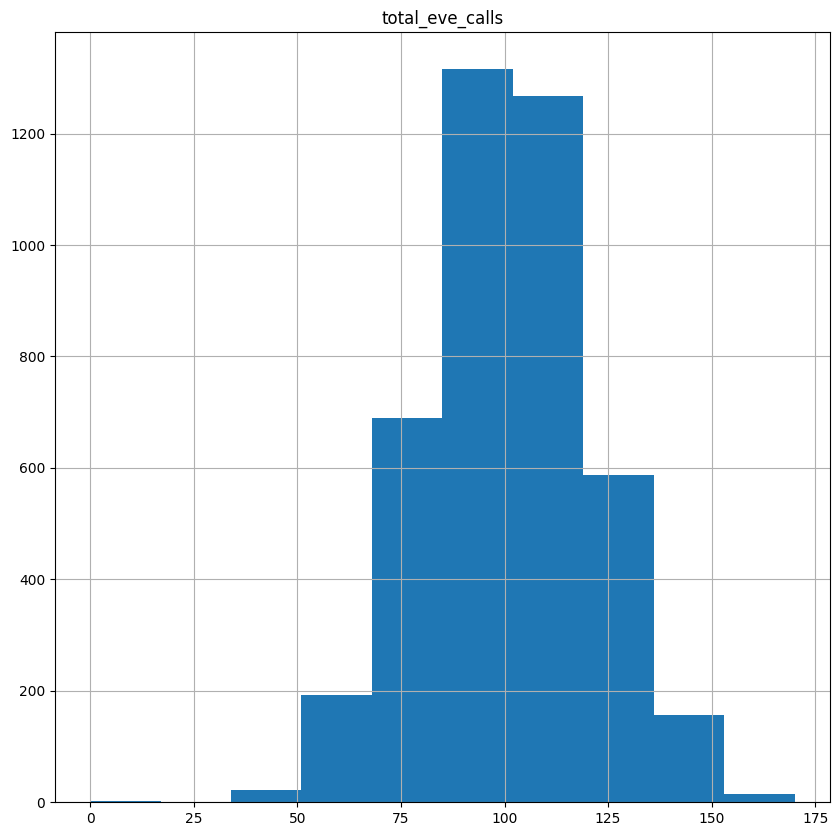

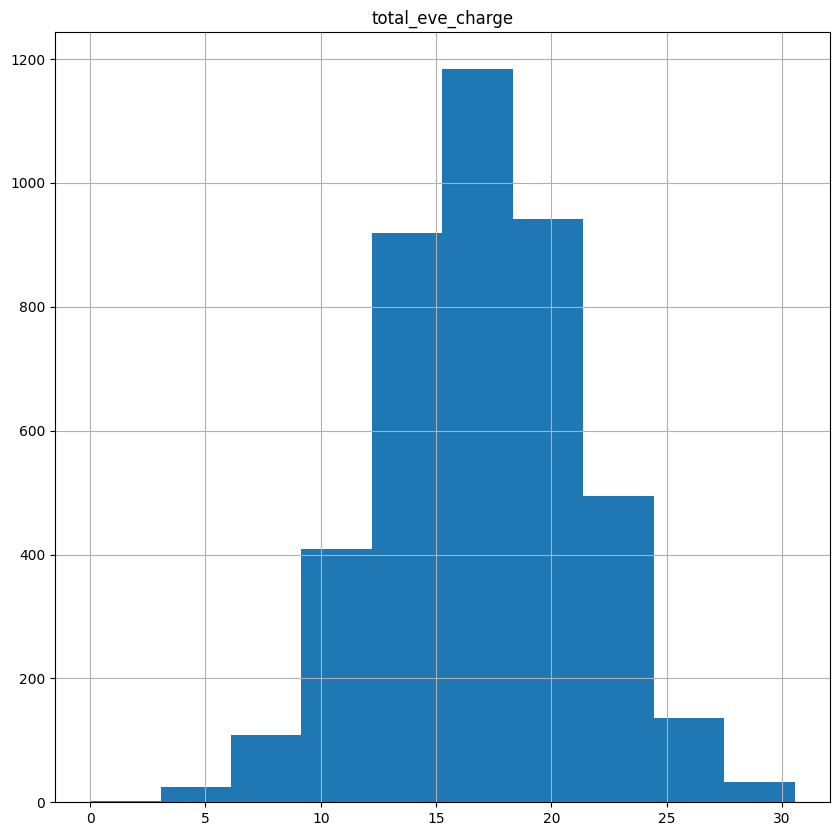

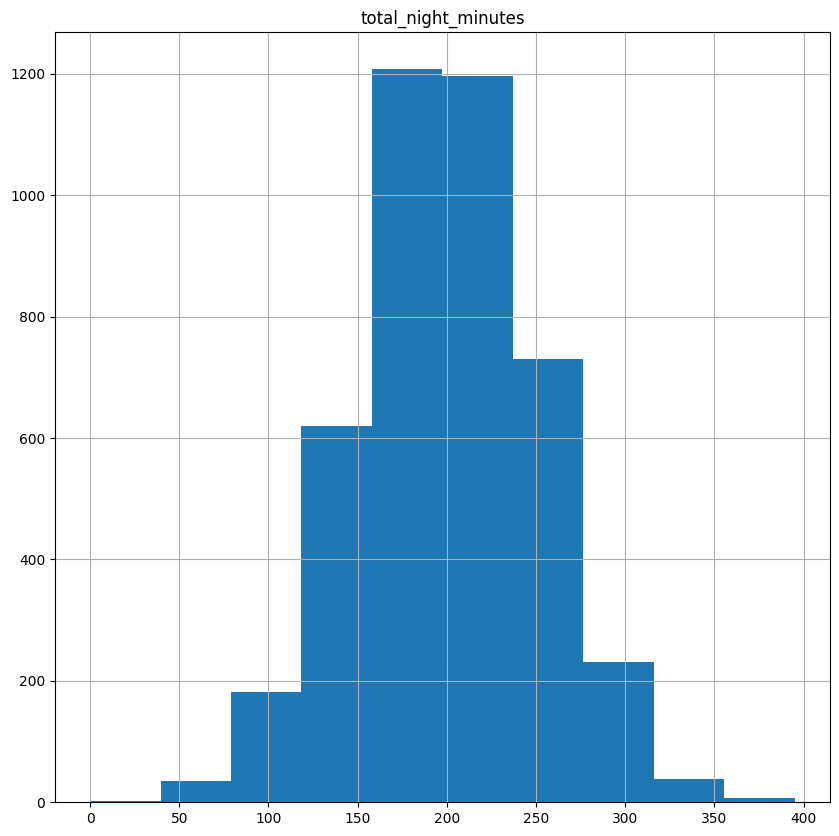

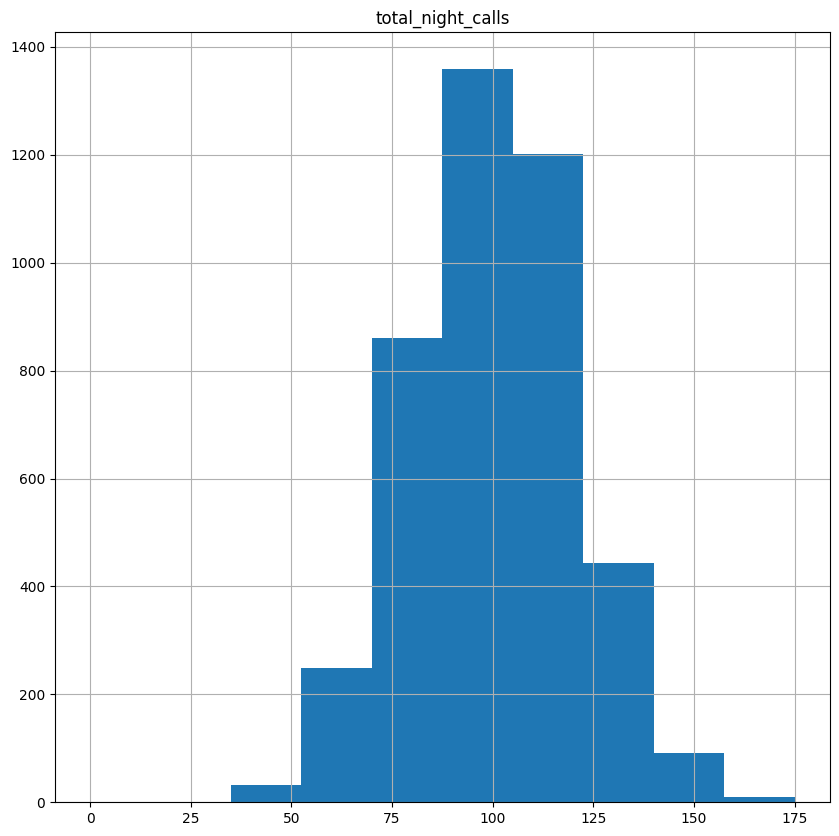

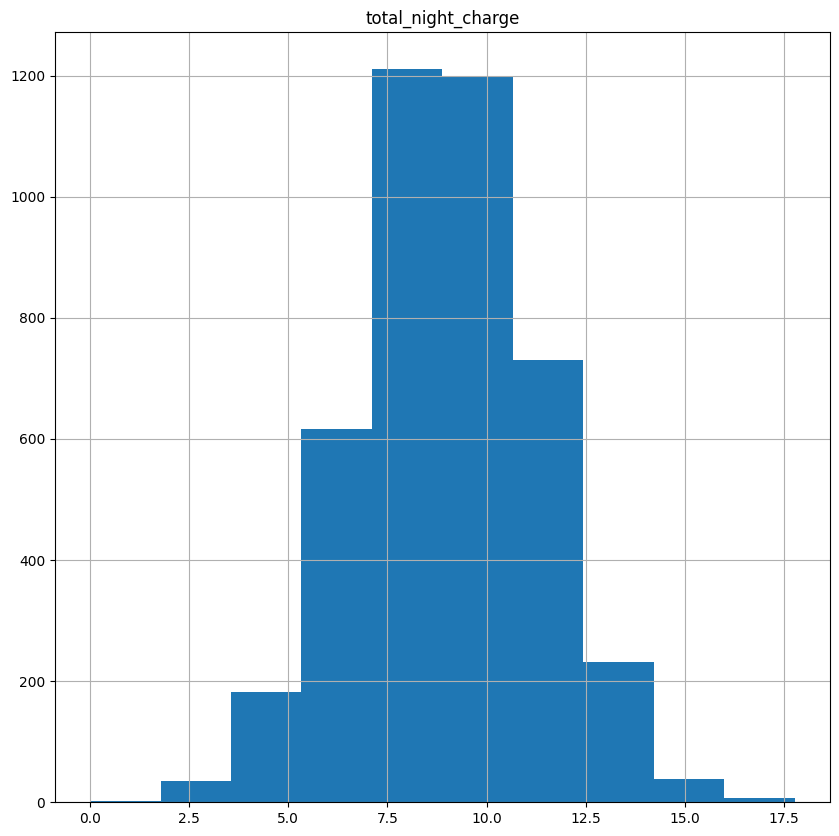

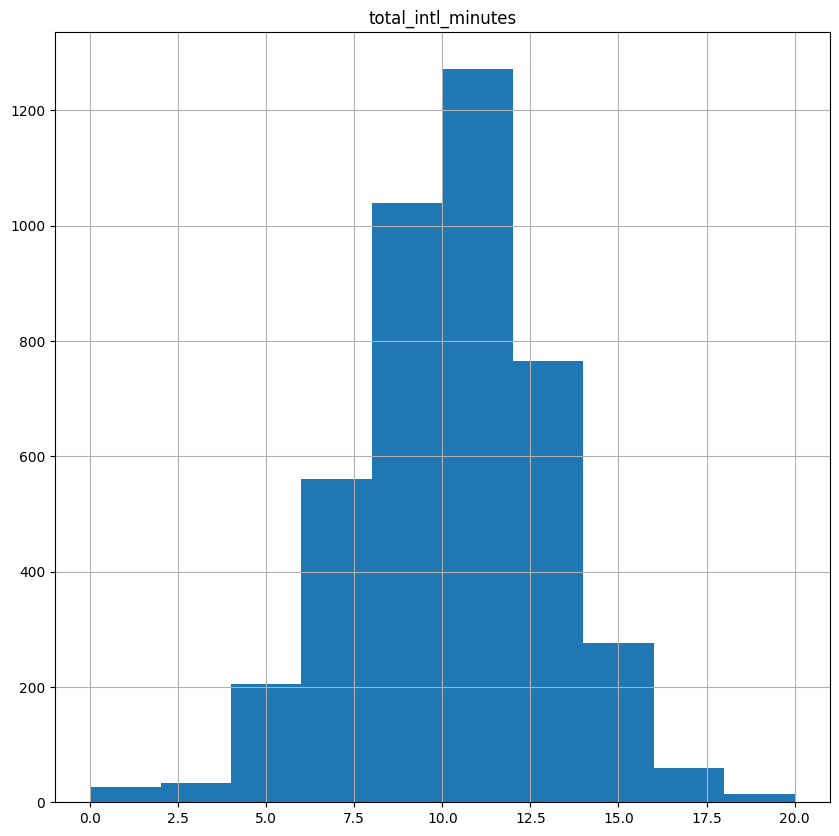

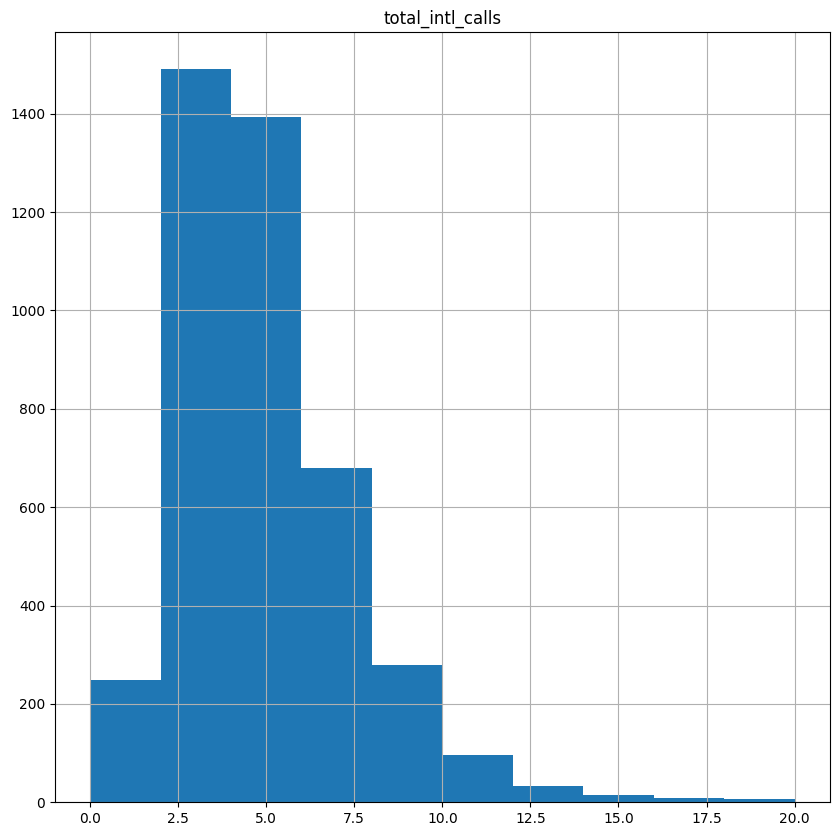

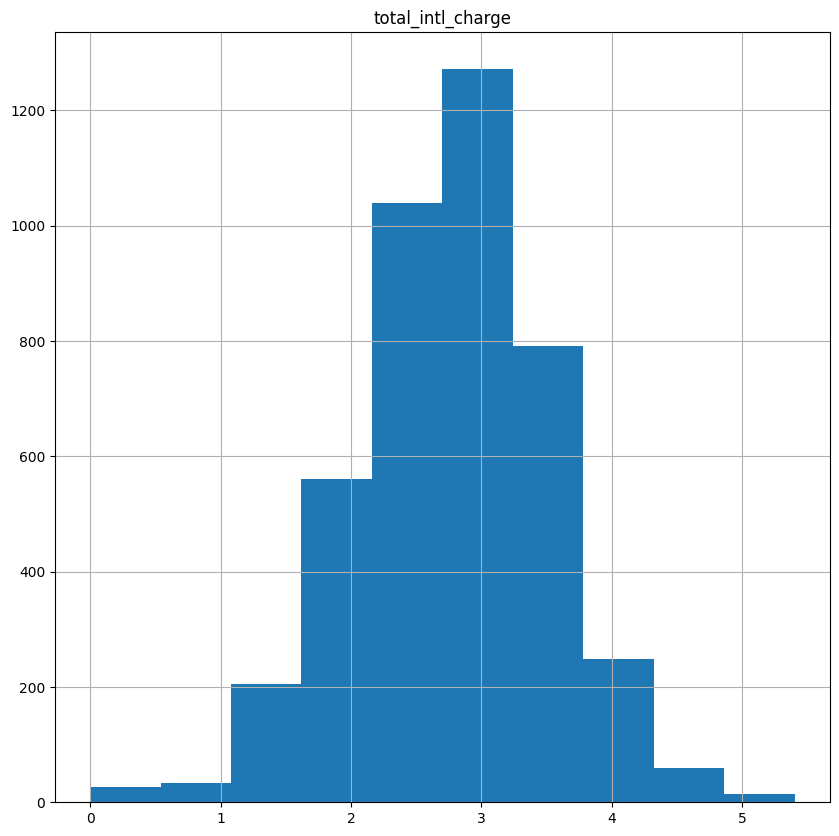

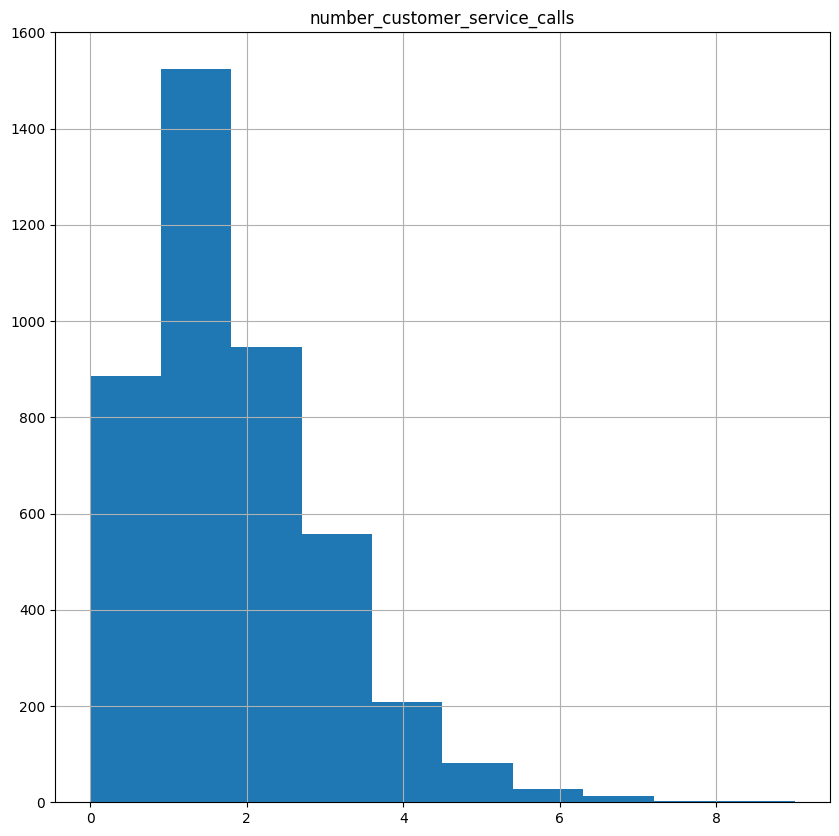

In [18]:
# Plot object
for col in numeric_dataset:
    dataset[col].hist(figsize=(10, 10))
    plt.title(col)
    plt.show()

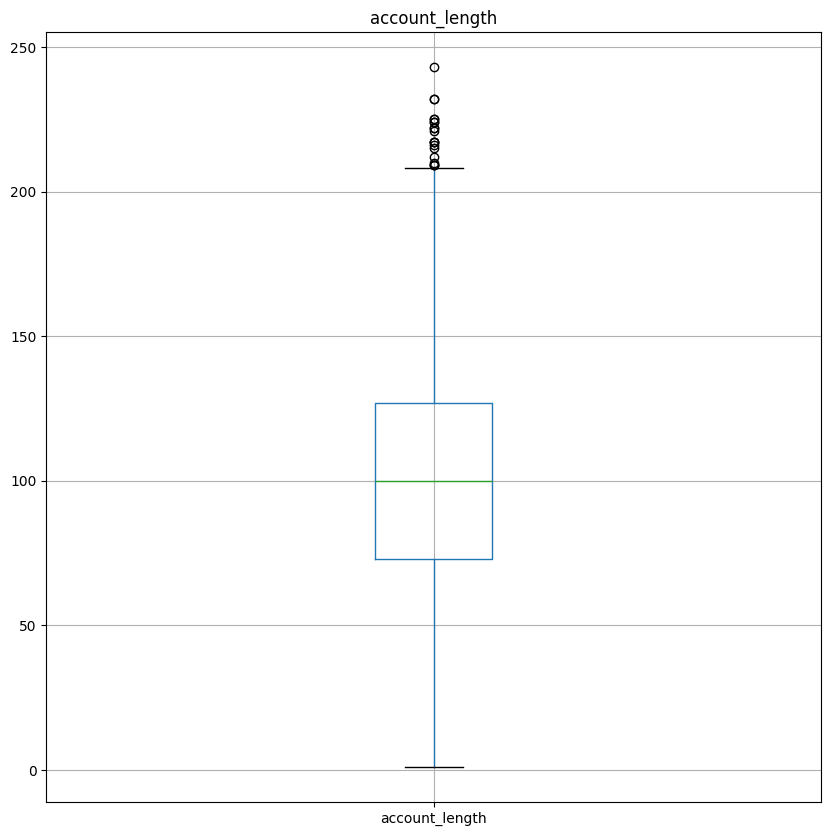

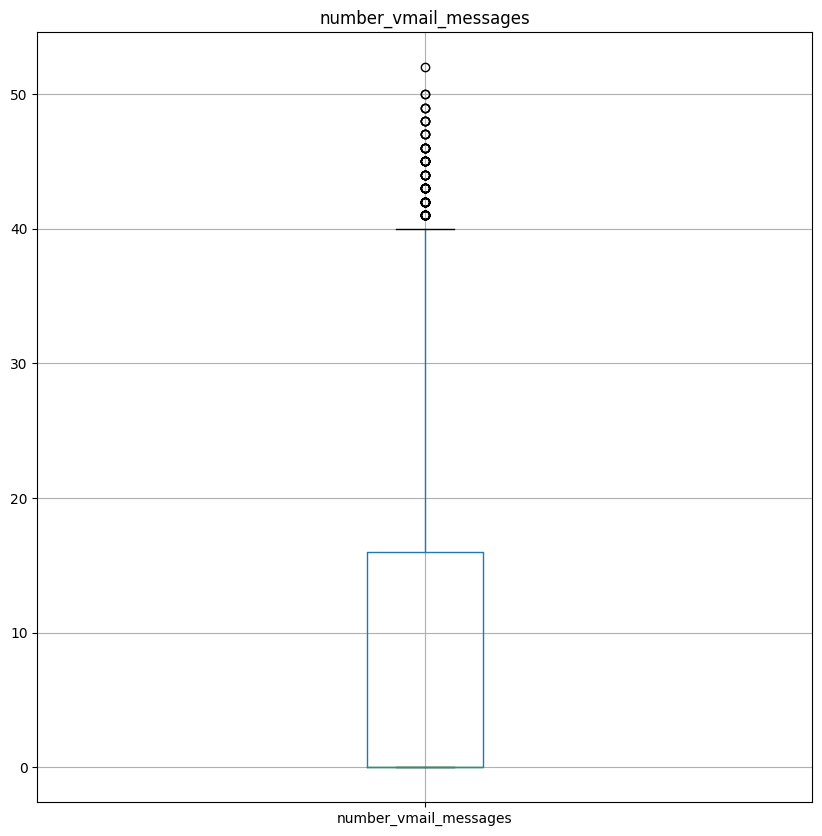

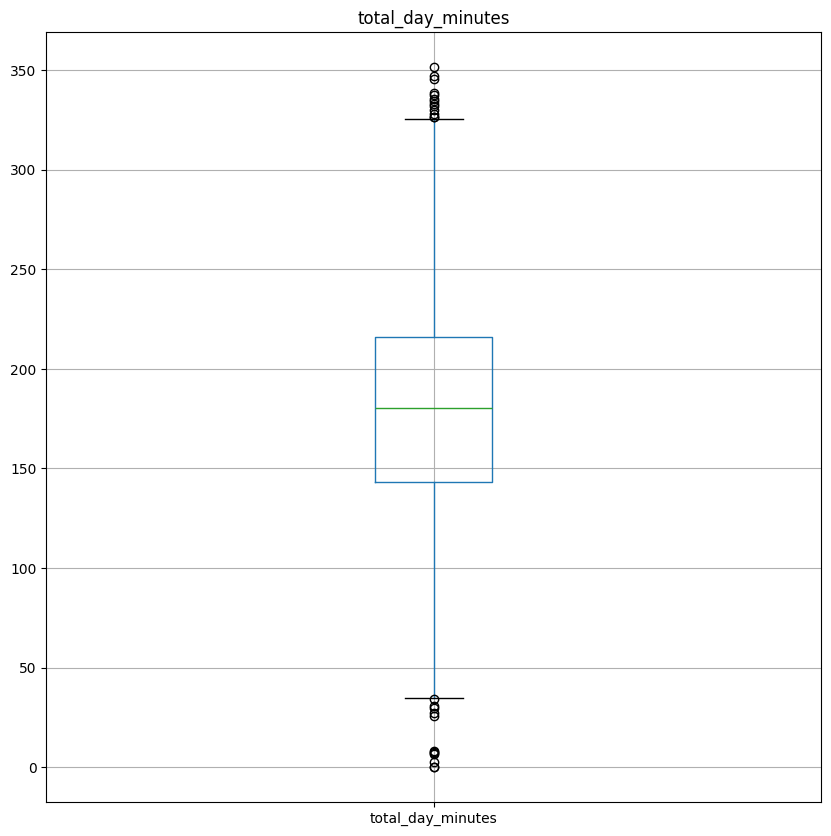

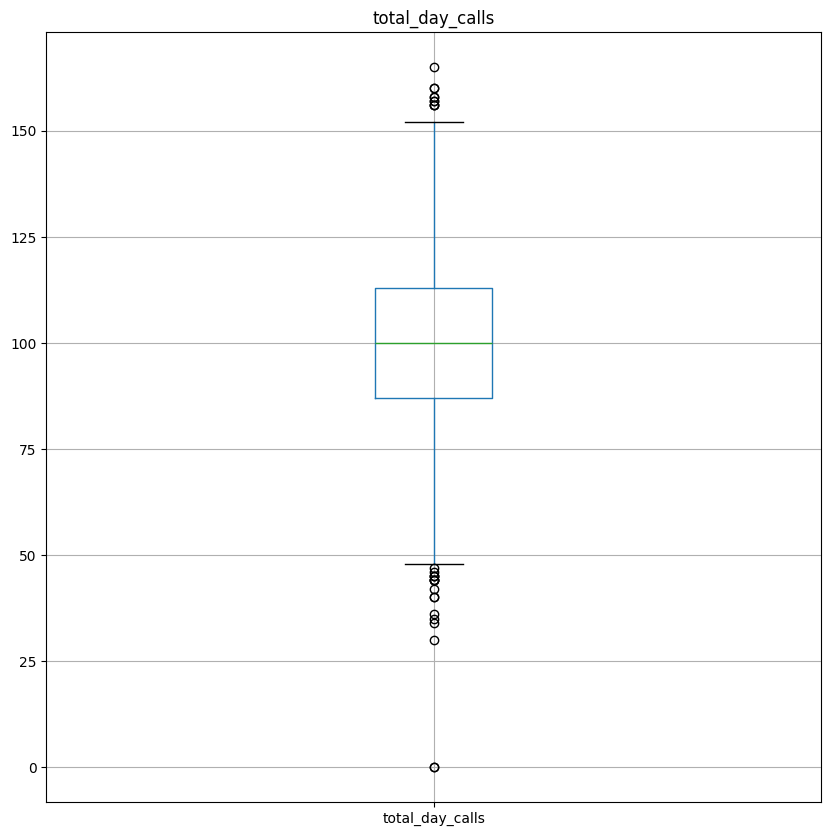

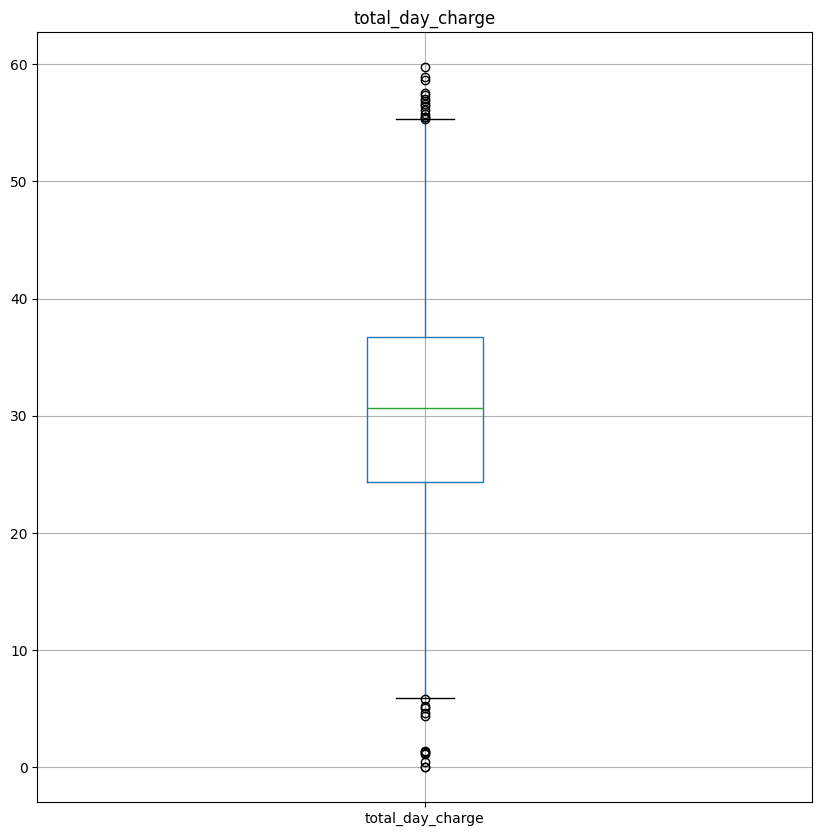

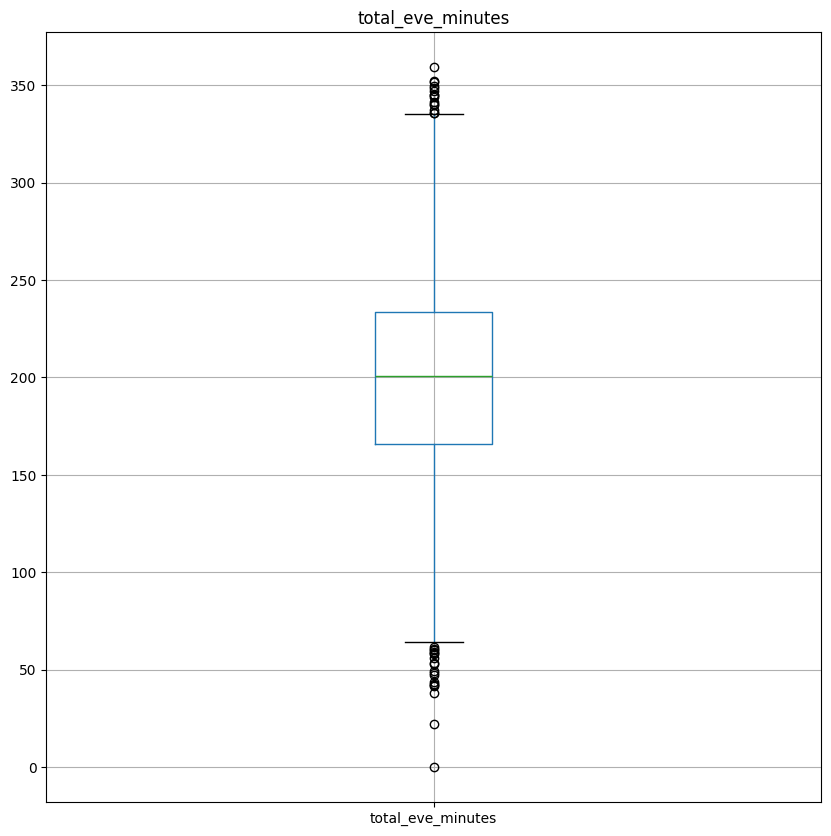

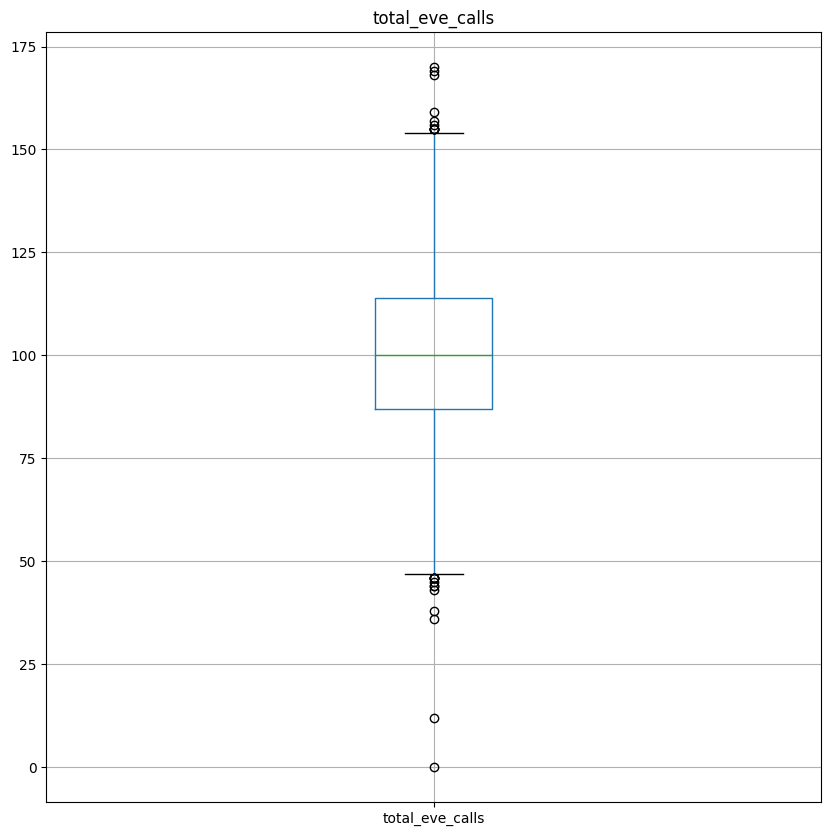

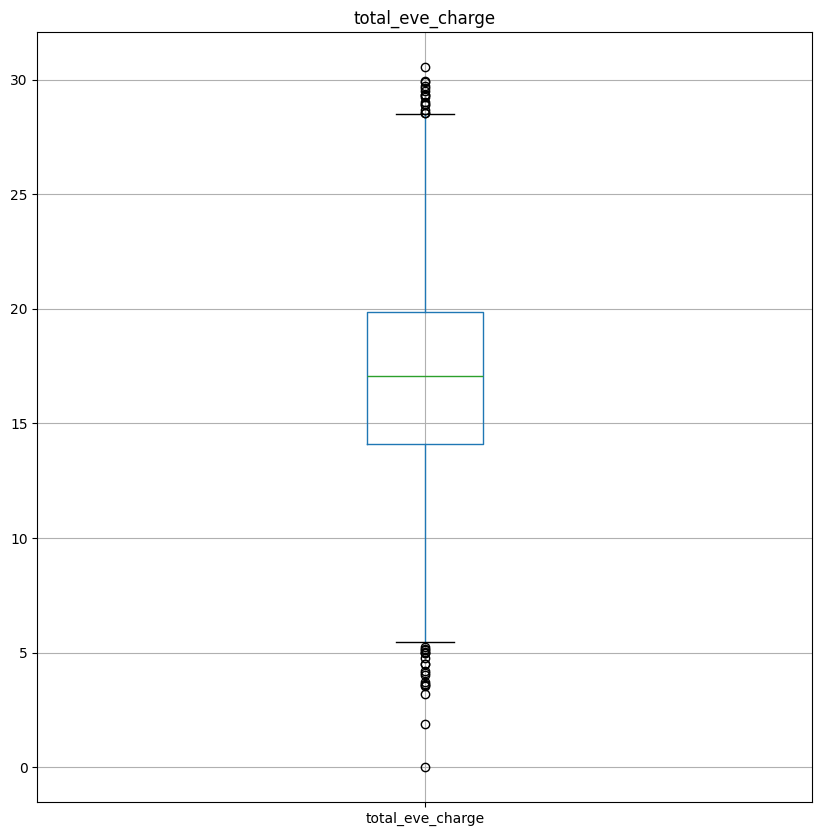

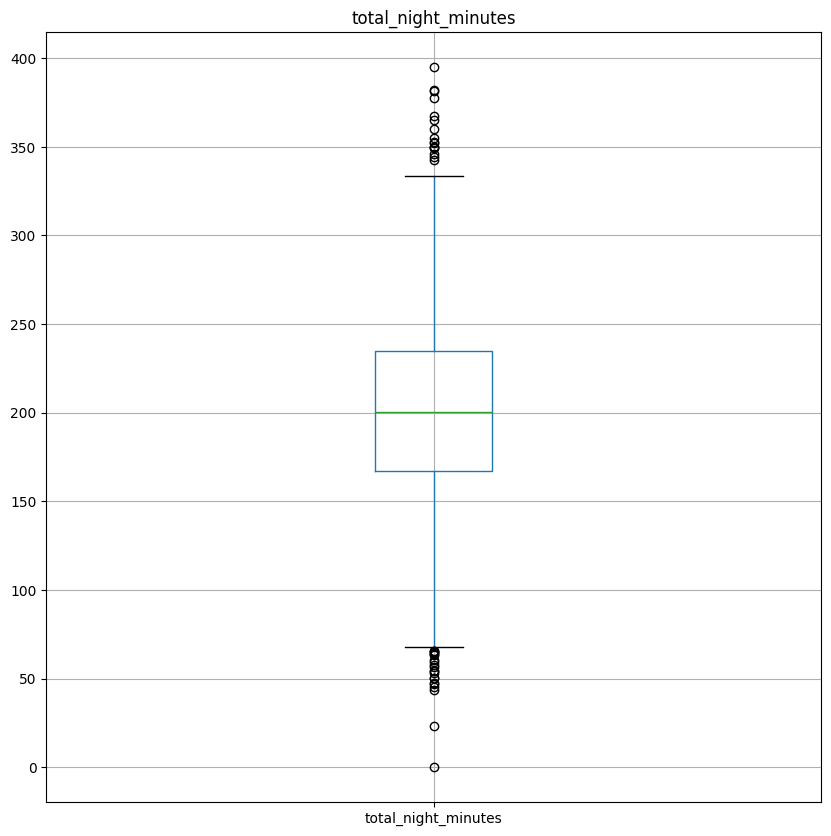

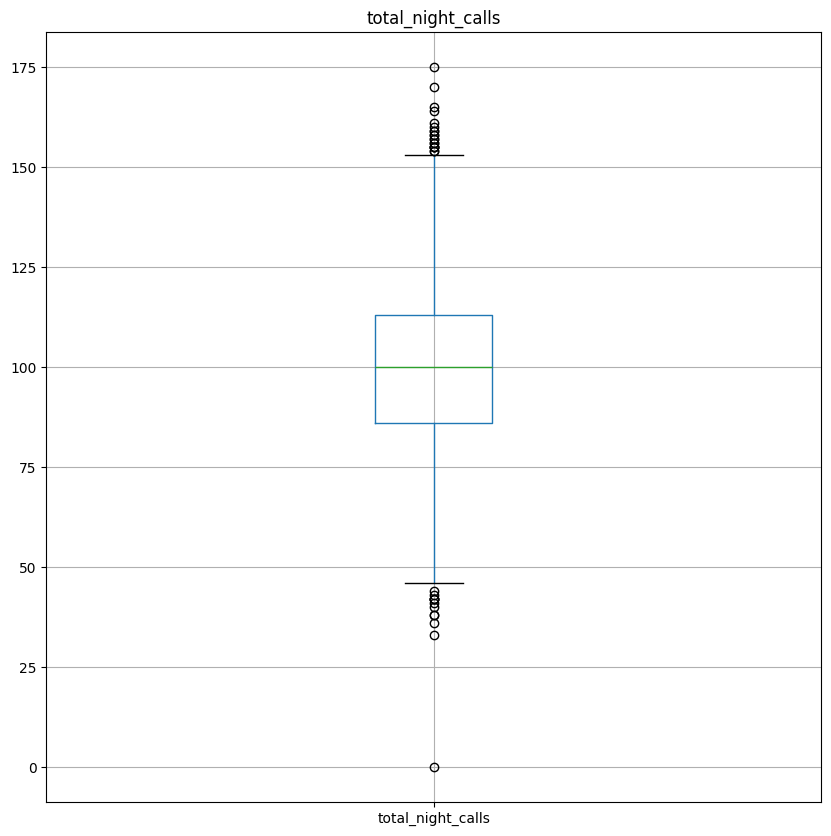

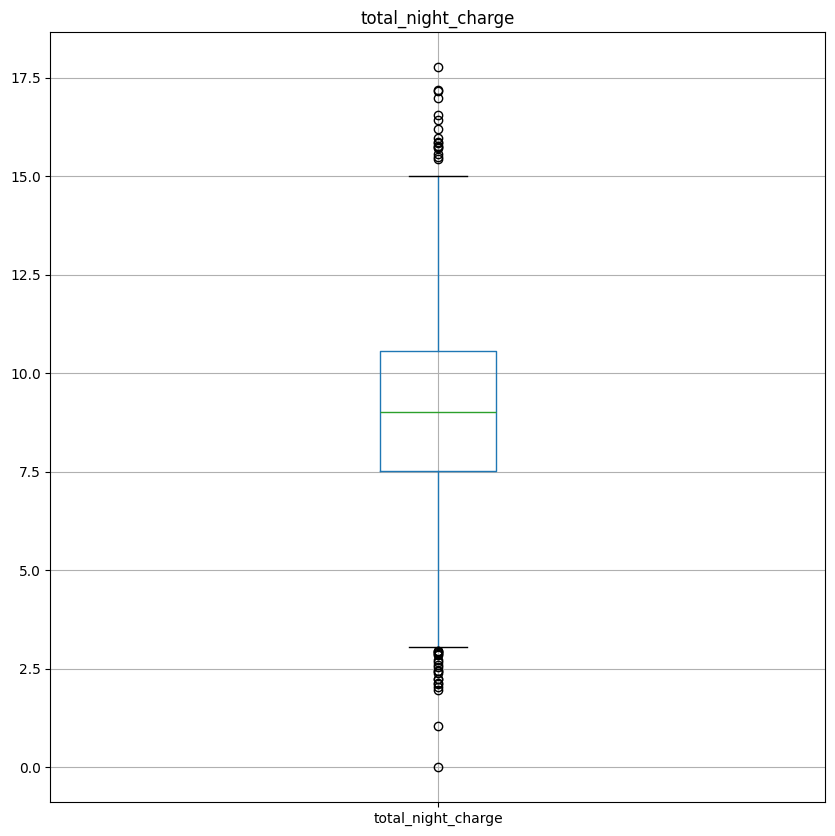

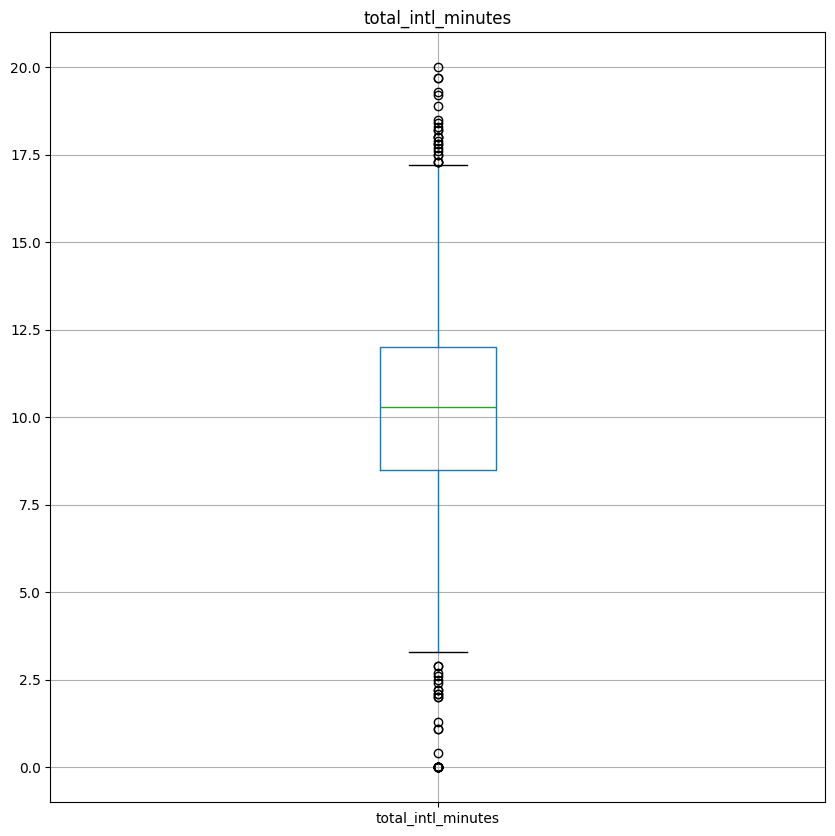

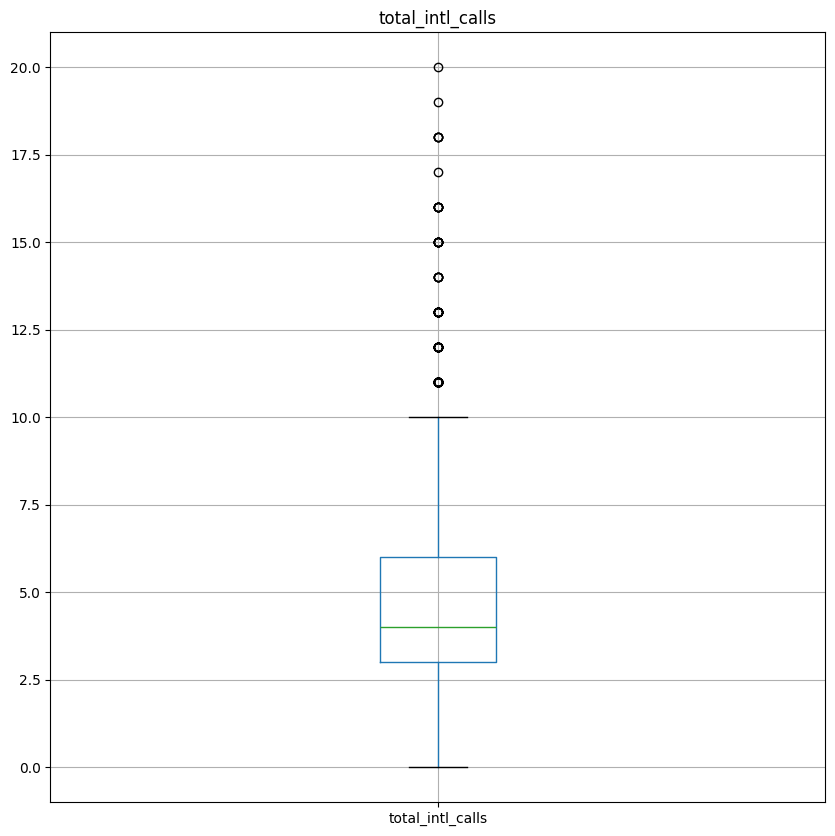

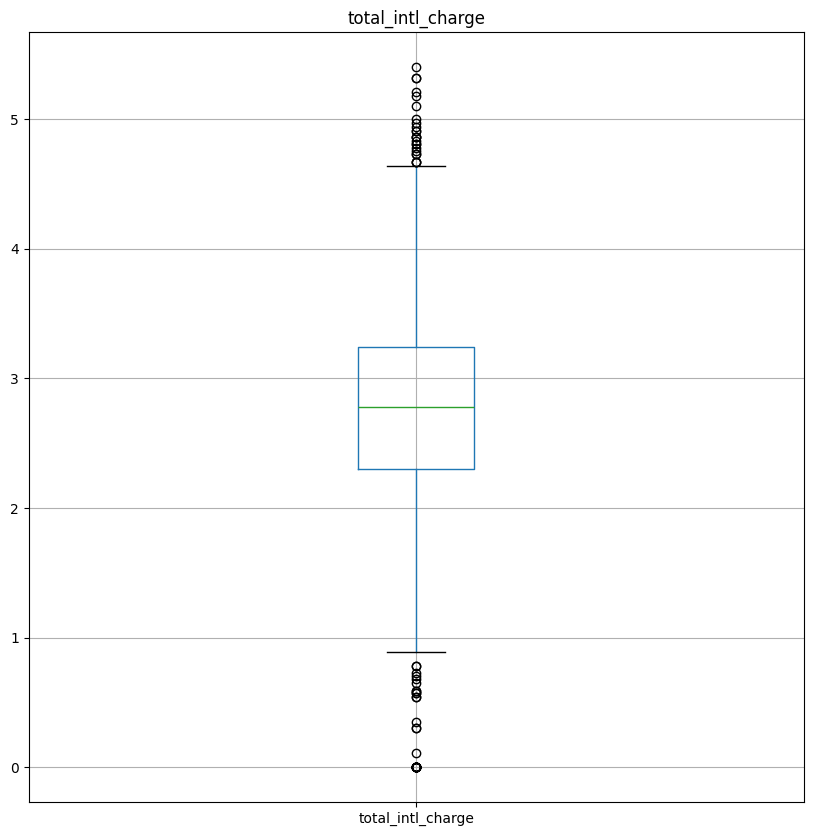

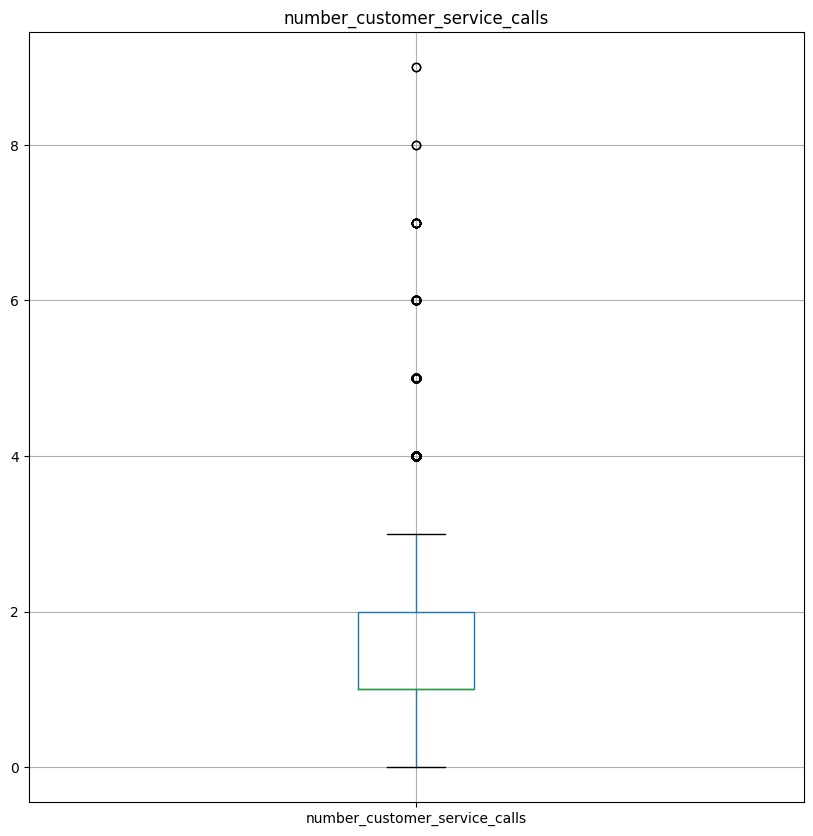

In [21]:
# Plot object
for col in numeric_dataset:
    dataset.boxplot(figsize=(10, 10), column=[col])
    plt.title(col)
    plt.show()

## Pre-Processing data

In [24]:
# Copy data
dataset1 = dataset.copy()

In [25]:
# hashing encoder for state because column have some different data
he = ce.HashingEncoder(cols="state")
dataset_hashed = he.fit_transform(dataset1)
dataset_hashed

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0,1,0,0,0,0,0,0,137,area_code_415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,0,0,0,0,1,0,0,0,84,area_code_408,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,0,0,0,0,1,0,0,0,75,area_code_415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0,0,0,0,1,0,0,0,121,area_code_510,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,0,0,0,0,83,area_code_415,...,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,0,0,0,0,0,0,1,0,73,area_code_408,...,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,1,0,0,0,0,0,0,0,75,area_code_408,...,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,0,0,0,0,0,0,1,0,50,area_code_408,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [26]:
# Dummy
dataset_hash_dummy = pd.get_dummies(dataset_hashed, drop_first=True)
dataset_hash_dummy

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,0,0,0,0,1,0,0,0,107,26,...,11.45,13.7,3,3.70,1,True,False,False,True,False
1,0,1,0,0,0,0,0,0,137,0,...,7.32,12.2,5,3.29,0,True,False,False,False,False
2,0,0,0,0,1,0,0,0,84,0,...,8.86,6.6,7,1.78,2,False,False,True,False,False
3,0,0,0,0,1,0,0,0,75,0,...,8.41,10.1,3,2.73,3,True,False,True,False,False
4,0,0,0,0,1,0,0,0,121,24,...,9.57,7.5,7,2.03,3,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,0,0,0,0,83,0,...,9.62,10.3,6,2.78,0,True,False,False,False,False
4246,0,0,0,0,0,0,1,0,73,0,...,8.38,11.5,6,3.11,3,False,False,False,False,False
4247,1,0,0,0,0,0,0,0,75,0,...,5.81,6.9,7,1.86,1,False,False,False,False,False
4248,0,0,0,0,0,0,1,0,50,40,...,13.39,9.9,5,2.67,2,False,False,False,True,False


In [28]:
# Corr
corr = dataset_hash_dummy.corr()
corr.style.background_gradient(cmap='RdYlGn')

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
col_0,1.000000,-0.196588,-0.125256,-0.154772,-0.190807,-0.106960,-0.195436,-0.142426,0.013689,-0.011134,-0.010400,-0.008203,-0.010400,0.002684,0.035676,0.002681,-0.004086,-0.022958,-0.004051,-0.003299,0.017064,-0.003344,-0.005630,0.006697,-0.018174,-0.002390,-0.011900,-0.044855
col_1,-0.196588,1.000000,-0.129957,-0.160581,-0.197968,-0.110974,-0.202771,-0.147772,-0.002419,-0.016284,0.033236,0.021134,0.033233,-0.004855,0.001070,-0.004858,-0.009436,0.005793,-0.009430,0.011348,0.008412,0.011355,0.016493,0.008631,-0.014369,-0.013135,-0.019103,0.044542
col_2,-0.125256,-0.129957,1.000000,-0.102315,-0.126136,-0.070708,-0.129196,-0.094153,-0.003341,-0.026112,-0.018243,-0.010834,-0.018251,0.025219,-0.037600,0.025223,-0.002887,0.001241,-0.002909,0.000378,0.019211,0.000454,-0.009246,-0.005667,0.004604,-0.013044,-0.018201,0.013421
col_3,-0.154772,-0.160581,-0.102315,1.000000,-0.155859,-0.087369,-0.159640,-0.116340,0.007931,0.026162,-0.008523,0.023405,-0.008523,0.022710,0.004787,0.022720,0.020304,0.019944,0.020298,-0.003335,-0.019786,-0.003316,0.010988,0.022971,-0.011248,0.014245,0.027464,-0.006681
col_4,-0.190807,-0.197968,-0.126136,-0.155859,1.000000,-0.107711,-0.196808,-0.143426,0.005678,0.006107,0.030074,-0.000693,0.030072,0.011548,0.007012,0.011563,0.033376,-0.012775,0.033361,-0.012685,-0.009887,-0.012722,-0.005834,-0.017611,-0.000300,0.020196,0.001124,0.021378
col_5,-0.106960,-0.110974,-0.070708,-0.087369,-0.107711,1.000000,-0.110324,-0.080400,-0.002614,0.019200,-0.023118,-0.003968,-0.023117,0.012583,-0.007126,0.012574,0.002236,0.019095,0.002236,-0.000872,-0.030583,-0.000867,0.007517,-0.002096,0.009094,0.012056,0.015435,0.029053
col_6,-0.195436,-0.202771,-0.129196,-0.159640,-0.196808,-0.110324,1.000000,-0.146906,-0.004608,0.006118,-0.002344,-0.013766,-0.002335,-0.045897,-0.027168,-0.045919,-0.015330,0.009008,-0.015338,0.026359,0.019179,0.026381,-0.003174,0.002962,0.005596,-0.024772,0.002071,-0.031372
col_7,-0.142426,-0.147772,-0.094153,-0.116340,-0.143426,-0.080400,-0.146906,1.000000,-0.018534,-0.000394,-0.020124,-0.010545,-0.020124,-0.010297,0.014376,-0.010288,-0.025949,-0.011810,-0.025942,-0.023956,-0.015914,-0.023984,-0.012005,-0.018878,0.034780,0.012884,0.009895,-0.015638
account_length,0.013689,-0.002419,-0.003341,0.007931,0.005678,-0.002614,-0.004608,-0.018534,1.000000,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002,-0.000438,-0.019074,0.027050,0.001663,0.019378
number_vmail_messages,-0.011134,-0.016284,-0.026112,0.026162,0.006107,0.019200,0.006118,-0.000394,-0.006626,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303,0.009604,-0.007583,0.004808,0.954014,-0.100347


In [29]:
# Drop corr columns
dataset_hash_dummy_drop_corr = dataset_hash_dummy.drop(columns=["voice_mail_plan_yes","total_day_charge","total_eve_charge","total_night_charge","total_intl_charge"])

## OverSampling by SMOTE, Scale with model LogisticRegression

In [34]:
# SMOTE
X = dataset_hash_dummy_drop_corr.drop(["churn_yes"], axis=1)
y = dataset_hash_dummy_drop_corr.churn_yes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42, k_neighbors=5)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
X_train_resampled.shape, y_train_resampled.shape

((5862, 22), (5862,))

In [35]:
# Scale
scale_columns = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls']

scaler = MinMaxScaler()
scaler.fit(X_train_resampled[scale_columns])
X_train_resampled[scale_columns] = scaler.transform(X_train_resampled[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

              precision    recall  f1-score   support

       False       0.89      0.95      0.92       721
        True       0.56      0.35      0.43       129

    accuracy                           0.86       850
   macro avg       0.73      0.65      0.68       850
weighted avg       0.84      0.86      0.85       850



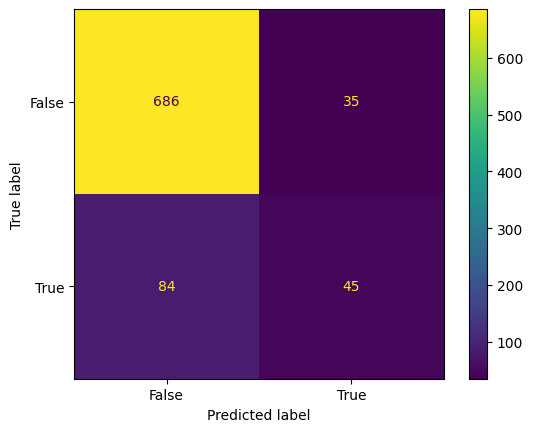

In [37]:
# Logistic Regression
model_log = LogisticRegression()
model_log.fit(X_train_resampled, y_train_resampled)

y_pred = model_log.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## No OverSampling, no scale with XGBoost

In [38]:
X = dataset_hash_dummy_drop_corr.drop(["churn_yes"], axis=1)
y = dataset_hash_dummy_drop_corr.churn_yes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       721
        True       0.92      0.81      0.86       129

    accuracy                           0.96       850
   macro avg       0.94      0.90      0.92       850
weighted avg       0.96      0.96      0.96       850



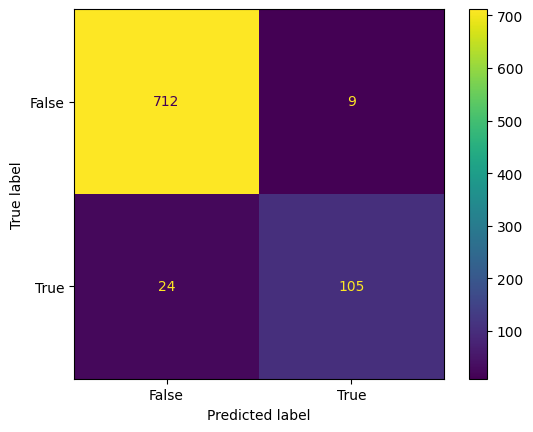

In [39]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators=200)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Test

In [49]:
test = pd.read_csv("test.csv")
id_submit = test.id

In [50]:
test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [51]:
test.drop(columns=["id"], inplace=True)

In [52]:
test_hash_state = he.fit_transform(test)
test_hash_state.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0,1,0,0,0,0,0,0,128,area_code_415,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,1,0,0,0,0,0,0,118,area_code_510,...,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,0,0,0,0,0,0,0,1,62,area_code_415,...,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,0,0,0,0,1,0,0,0,93,area_code_510,...,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,1,0,0,0,0,0,0,0,174,area_code_415,...,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [53]:
test_dummy =  pd.get_dummies(test_hash_state,drop_first=True)
test_dummy_drop_corr = test_dummy.drop(columns=["voice_mail_plan_yes","total_day_charge","total_eve_charge","total_night_charge","total_intl_charge"])

In [54]:
test_dummy_drop_corr.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls',
       'area_code_area_code_415', 'area_code_area_code_510',
       'international_plan_yes'],
      dtype='object')

In [55]:
y_pred_submit = model_xgb.predict(test_dummy_drop_corr)

In [56]:
y_pred_submit

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
submit_result = pd.DataFrame({'id': id_submit, 'churn': y_pred_submit})
submit_result

,id,churn
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
745,746,0
746,747,0
747,748,0
748,749,0


In [58]:
submit_result.churn.replace([0, 1], ['no', 'yes'], inplace=True)
submit_result

C:\Users\asus\AppData\Local\Temp\ipykernel_15428\34270402.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  submit_result.churn.replace([0, 1], ['no', 'yes'], inplace=True)


,id,churn
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,no
...,...,...
745,746,no
746,747,no
747,748,no
748,749,no


In [60]:
submit_result.to_csv("submit_result.csv", index=False)